
1. **K-means Clustering**:
   - K-means is a popular clustering algorithm used in machine learning. The "K" stands for the number of clusters you want to divide your data into.
   - The algorithm works iteratively to assign each data point to one of K clusters based on the feature similarity.
   - Initially, it randomly selects K points (called centroids) as the initial cluster centers.
   - Then, it iterates through two steps:
     - Assign each data point to the nearest centroid, forming K clusters.
     - Recalculate the centroids of the K clusters as the mean of all data points assigned to each cluster.
   - It repeats these steps until the centroids no longer change significantly or a maximum number of iterations is reached.

2. **Colorization with K-means**:
   - When it comes to colorization, each pixel in an image can be represented as a data point with three features: red, green, and blue (RGB) values.
   - Instead of just using brightness like in traditional K-means, we use all three color channels to measure similarity.
   - So, each pixel becomes a point in a three-dimensional space (RGB space).
   - We apply K-means clustering to these points, aiming to group them into K clusters based on their RGB values.
   - Once clustering is done, each cluster centroid represents a color that is characteristic of a group of pixels.
   - Then, for each pixel in the black and white image, we replace its color with the color of the cluster centroid it belongs to.
   - This process gives us a colorized version of the image, where similar pixels in terms of color are grouped together.

3. **Understanding K-means Colorization**:
   - K-means colorization works by finding the most representative colors in the image and then assigning those colors to similar pixels.
   - The number of clusters (K) determines the variety of colors in the final image. A higher K value leads to more detailed colorization but can also increase computational complexity.
   - It's important to choose the initial cluster centers carefully as it can affect the final result. Sometimes, running the algorithm multiple times with different initializations can help find better solutions.
   - K-means colorization is a form of unsupervised learning because it doesn't require manually labeled data. The algorithm learns to colorize based solely on the pixel values of the black and white image.

In this notebook, we will try doing this on 2 images.

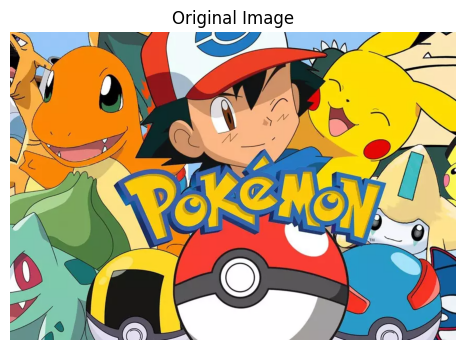

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


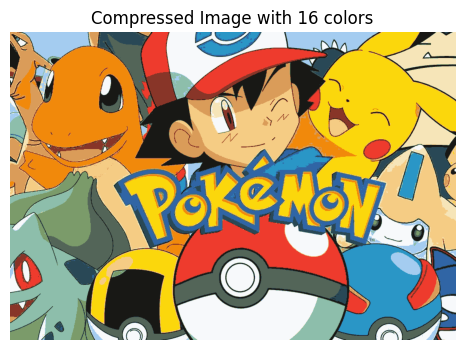

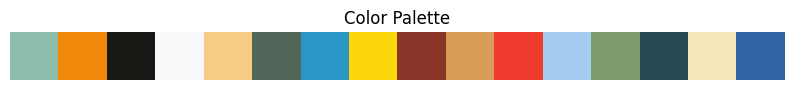

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


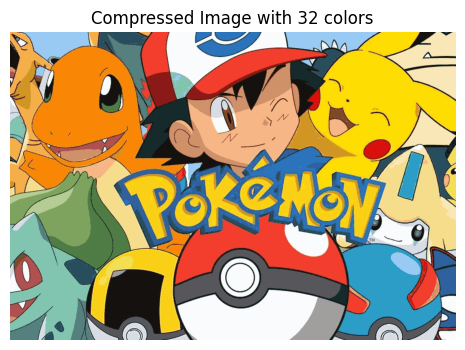

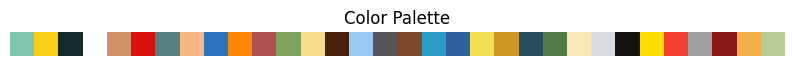

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


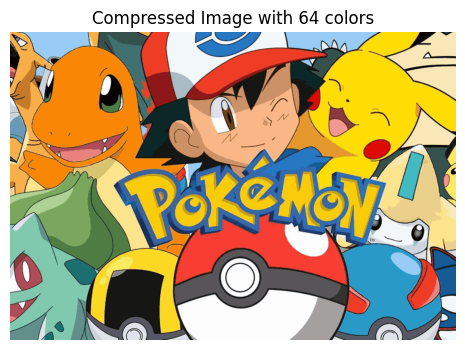

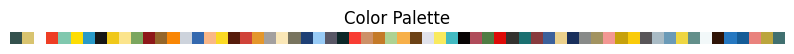

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.image as mpimg

def compress_and_show_images_with_palette(image_path, color_options):
    # Load the image
    img = imread(image_path)

    # Normalize the image
    if img.dtype == np.uint8:  # Checks if the image data type is integer-based (0-255)
        img = img / 255.0  # Normalize to 0-1

    img_size = img.shape

    # Check if there's an alpha channel and remove it if present
    if img.shape[2] == 4:
        img = img[:, :, :3]  # Drop the alpha channel

    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Process each color option
    for k in color_options:
        # Prepare data for k-means
        X = img.reshape(-1, 3)

        # Apply k-means to compress the image
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        # Replace each pixel with its center color
        compressed_img = centers[labels].reshape(img_size[:2] + (3,))

        # Display the compressed image
        plt.figure(figsize=(8, 4))
        plt.imshow(compressed_img)
        plt.title(f"Compressed Image with {k} colors")
        plt.axis('off')
        plt.show()

        # Display the color palette
        plt.figure(figsize=(10, 1))
        plt.imshow([centers])
        plt.axis('off')
        plt.title("Color Palette")
        plt.show()

# Example usage
compress_and_show_images_with_palette("/content/Pokemon.PNG", [4, 8, 16, 32, 64])  # Adjust the array to include other numbers of colors


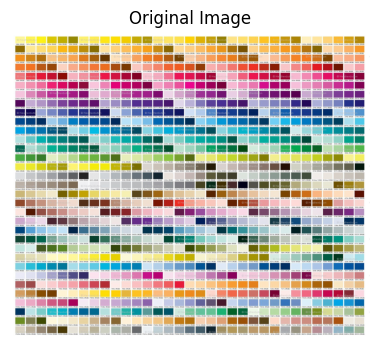

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


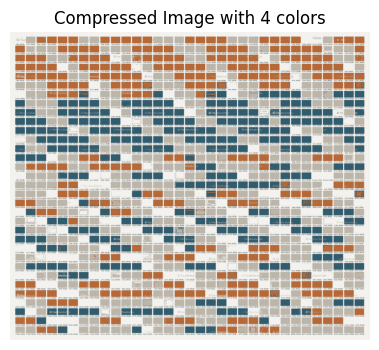

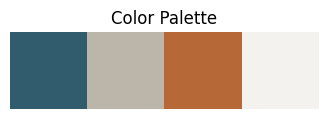

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


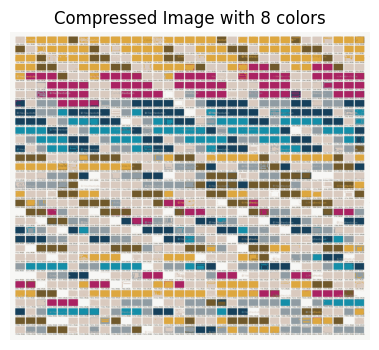

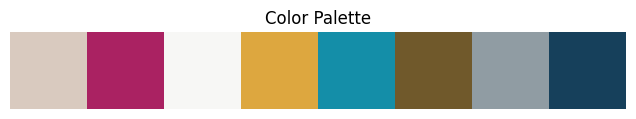

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


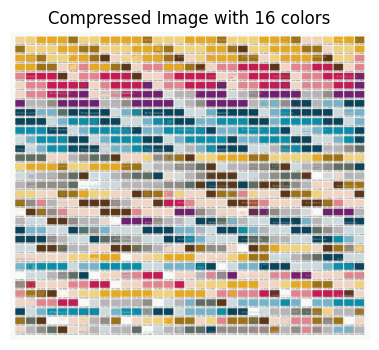

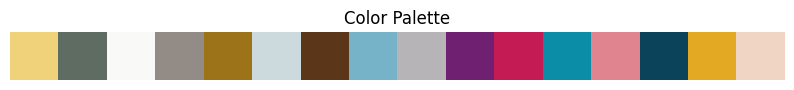

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


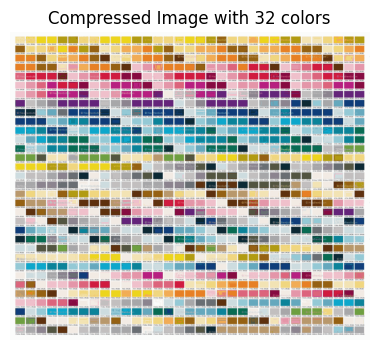

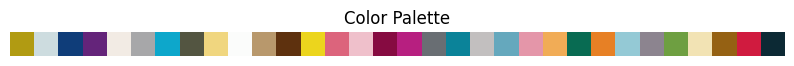

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


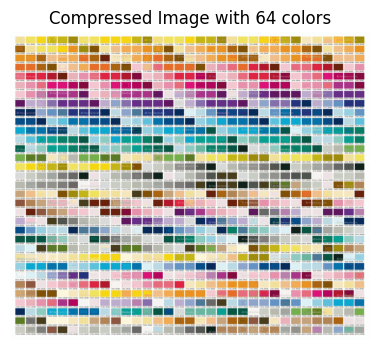

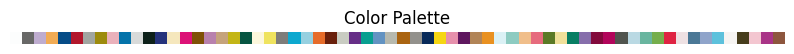

In [3]:
# Example usage
compress_and_show_images_with_palette("/content/5a1a7bece38d8a3d4de643aaf92676ef.jpg", [4, 8, 16, 32, 64])  # Adjust the array to include other numbers of colors